In [53]:
import numpy as np
import matplotlib.pyplot as plt

from objects import *

%matplotlib inline

In [54]:
f = D('test_data/STD-3.csv')

In [62]:
do = f.rawdata
do['Al27'][100] = 0.0
d = do.copy()

In [64]:
tstep = np.mean(np.diff(d['Time']))
exponent = 1.17

t = d['Time']

for k, s in d.items():
    if k is not 'Time':
        for i in np.arange(t.size - 2):
            if s[i+1] < s[i] * np.exp(-exponent * tstep):
                s[i] = np.mean(s[[i,i+2]])
            else:
                s[i] = s[i+1]

(0, 200)

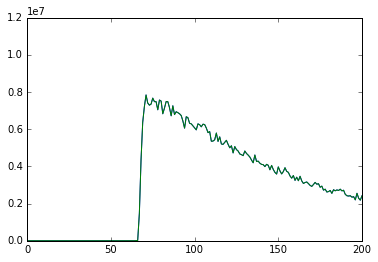

In [65]:
plt.plot(d['Al27'])
plt.plot(do['Al27'])
plt.xlim(0,200)

In [ ]:
# define despiking functions. Change numbers here to change despiking parameters.
def filt_expdecay(rawdata, exponent=1.17, tstep=None):
    """Removes spikes based on the flushing time of the laser signal"""
    if tstep is None:
        tkey = [i for i in list(rawdata.keys()) if 'time' in i.lower()][0]
        tstep = np.mean(np.diff(rawdata[tkey]))
    
    analytes = [i for i in list(rawdata.keys()) if 'time' not in i.lower()]

    def efilt(x, exponent, tstep):
        if x[1] < x[0]*np.exp(-exponent * tstep):
            return np.mean(x[[0, 2]])
        else:
            return x[1]
    param = {'exponent': exponent,
             'tstep': tstep}
    return pd.rolling_apply(self.loc[:, analytes], 3,
                            lambda x: efilt(x, **param),
                            center=True)


def filt_noise(self, win=3, n=12.):
    """Remove outliers more than n multiples away from the error inherent in the count statistics"""
    analytes = self.columns[1:]
    def nfilt(x, win, n):
        sel = np.concatenate((np.arange(win)[:win/2], np.arange(win)[-(win/2):]))
        mid = (win + 1) / 2
        if (x[mid] > np.mean(x[sel]) + n * np.mean(x[sel]**0.5)) | (x[mid] < np.mean(x[sel]) - n *
                                                                    np.mean(x[sel]**0.5)):
            return np.mean(x[sel])
        else:
            return x[mid]
    param = {'win': win,
             'n': n}
    return pd.rolling_apply(self.loc[:,analytes], win,
                            lambda x: nfilt(x, **param), center=True)